# MNIST Classification Problem

In [8]:
import os
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Data

In [9]:
# Extracting the data.
data_path = os.getcwd() + "/data/train.csv"
data = pd.read_csv(data_path)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Converting data to NumPy array and suffling it to ensure randomness.
data = np.array(data)
np.random.shuffle(data)

# Dimensions of the data.
m, n = data.shape
print(m, n)

# Extracting a portion of the dataset for cross-validation.
data_cv = data[0:1000].T
Y_cv = data_cv[0] # Labels
X_cv = data_cv[1:n]
X_cv = X_cv / 255.

# The rest of the dataset is saved as training data.
data_t = data[1000:m].T
Y_t = data_t[0]
X_t = data_t[1:n]
X_t = X_t / 255

42000 785


In [11]:
Y_t, X_t.shape

(array([8, 3, 1, ..., 6, 5, 8]), (784, 41000))

### Model 

In [12]:
def init_model():
    # Random weights and biases between -0.5 and 0.5.
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Returns 0 if Z_i < 0 
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

# Softmax used to generate a probability distribution for the output layer.
def softmax(Z):
    result = np.exp(Z) / sum(np.exp(Z))
    return result

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    a1 = ReLU(Z1)
    Z2 = W2.dot(a1) + b2
    a2 = softmax(Z2)
    return Z1, a1, Z2, a2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, a1, Z2, a2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = a2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(a1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    # For each iteration, the weights and biases are corrected with respect to the alpha parameter.
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2 
    return W1, b1, W2, b2

In [13]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_model()
    for i in range(iterations + 1):
        Z1, a1, Z2, a2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, a1, Z2, a2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(a2), Y))
    return W1, b1, W2, b2 

In [14]:
W1, b1, W2, b2 = gradient_descent(X_t, Y_t, 0.15, 500)

iteration:  0
[8 8 1 ... 8 8 8] [8 3 1 ... 6 5 8]
Accuracy:  0.14248780487804877
iteration:  10
[8 8 1 ... 5 0 1] [8 3 1 ... 6 5 8]
Accuracy:  0.2586829268292683
iteration:  20
[8 8 1 ... 5 0 1] [8 3 1 ... 6 5 8]
Accuracy:  0.36121951219512194
iteration:  30
[8 8 1 ... 5 3 1] [8 3 1 ... 6 5 8]
Accuracy:  0.46470731707317076
iteration:  40
[8 8 1 ... 5 3 8] [8 3 1 ... 6 5 8]
Accuracy:  0.5509268292682927
iteration:  50
[8 8 1 ... 0 3 8] [8 3 1 ... 6 5 8]
Accuracy:  0.6174146341463415
iteration:  60
[8 8 1 ... 0 3 8] [8 3 1 ... 6 5 8]
Accuracy:  0.6618048780487805
iteration:  70
[8 8 1 ... 0 3 8] [8 3 1 ... 6 5 8]
Accuracy:  0.6940731707317073
iteration:  80
[8 8 1 ... 6 3 8] [8 3 1 ... 6 5 8]
Accuracy:  0.7184390243902439
iteration:  90
[8 8 1 ... 6 5 8] [8 3 1 ... 6 5 8]
Accuracy:  0.7371219512195122
iteration:  100
[8 8 1 ... 6 5 8] [8 3 1 ... 6 5 8]
Accuracy:  0.7531463414634146
iteration:  110
[8 8 1 ... 6 5 8] [8 3 1 ... 6 5 8]
Accuracy:  0.766609756097561
iteration:  120
[8 8 1 ..

In [15]:
def make_prediction(X, W1, b1, W2, b2):
    _,_,_,A2 = forward_prop(W1, b1, W2, b2, X)
    prediction = get_predictions(A2)
    return prediction

def visualize_prediction(index, W1, b1, W2, b2):
    # Extracts single image from given index and visualizes the prediction.
    image = X_t[:, index, None]
    prediction = make_prediction(image, W1, b1, W2, b2)
    label = Y_t[index]
    
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    image = image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


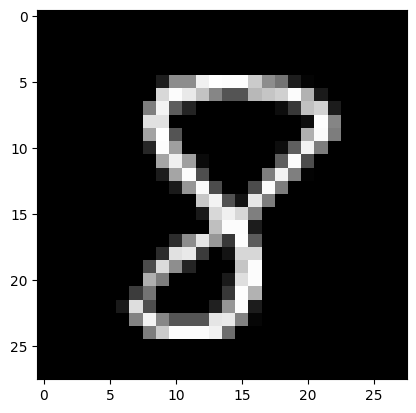

Prediction:  [8]
Label:  3


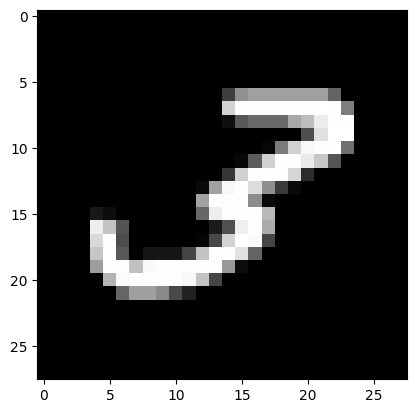

Prediction:  [1]
Label:  1


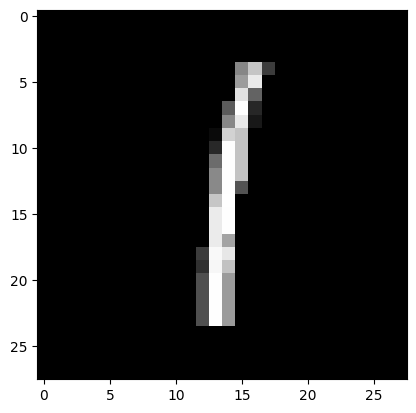

Prediction:  [7]
Label:  7


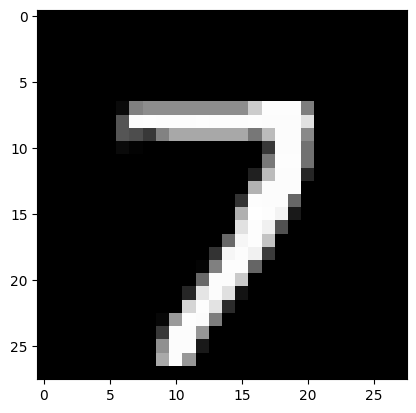

In [18]:
visualize_prediction(0, W1, b1, W2, b2)
visualize_prediction(1, W1, b1, W2, b2)
visualize_prediction(2, W1, b1, W2, b2)
visualize_prediction(3, W1, b1, W2, b2)

### Visualization

In [23]:
# Testing the model on our cross validation data to ensure that the model generates generealized predictions.
cv_predictions = make_prediction(X_cv, W1, b1, W2, b2)
print("Accuracy: ", get_accuracy(cv_predictions, Y_cv))

[2 9 6 5 1 5 8 8 4 8 6 4 0 6 2 1 1 1 6 1 2 9 7 1 9 5 6 5 8 1 8 0 2 1 6 4 0
 8 7 0 5 1 8 4 0 6 7 8 4 8 5 2 1 4 7 6 1 8 5 0 3 2 9 6 3 3 3 4 1 0 7 5 8 7
 5 9 9 3 3 9 9 4 7 9 0 5 7 0 9 0 2 8 7 9 5 0 6 5 8 3 8 9 3 6 6 3 4 1 7 6 0
 4 8 7 6 9 1 8 9 2 2 4 2 9 0 0 4 3 5 9 3 9 1 2 8 5 1 9 9 3 7 8 5 0 3 3 2 0
 1 5 3 2 9 7 1 8 7 6 9 3 5 0 2 5 8 7 0 1 1 9 3 8 9 3 1 2 1 1 8 4 3 5 4 4 0
 4 3 1 8 2 1 8 6 9 6 3 6 0 5 9 3 2 6 9 1 3 2 4 7 4 4 0 8 9 8 9 3 8 0 0 6 2
 6 8 3 9 1 4 7 1 3 4 1 1 4 9 1 7 5 3 5 0 6 5 8 6 9 1 6 4 3 8 3 7 4 5 5 7 0
 9 2 0 1 7 9 6 2 2 7 9 1 5 8 1 0 8 2 9 2 7 9 7 5 3 1 3 8 3 5 8 1 7 7 1 0 8
 1 3 0 4 3 4 4 7 4 2 0 6 1 1 5 5 6 0 2 4 7 0 7 9 7 0 9 4 5 9 4 8 3 6 7 8 3
 2 0 6 2 0 9 9 5 2 7 0 1 0 5 1 1 4 6 6 5 2 7 4 3 5 6 0 3 0 6 5 0 3 5 1 8 6
 1 1 7 5 8 2 1 4 2 7 3 7 4 1 3 0 8 7 0 5 3 0 7 0 0 1 0 5 7 9 4 7 3 4 8 2 0
 0 8 0 0 9 8 3 0 0 6 2 5 8 2 2 2 4 9 2 4 8 3 6 8 6 4 0 6 6 7 0 6 7 3 5 8 2
 2 1 8 9 2 9 9 4 8 7 6 1 8 3 1 0 4 1 6 4 5 3 0 0 8 8 7 3 4 9 2 7 3 0 4 7 5
 3 2 3 0 5 3 7 3 9 8 1 3 